# 量子计算简介 （Quantum Computing）

庞龙刚@华中师范大学

## 学习内容

1. 经典比特与量子比特
2. 量子门
3. 测量
4. 用 Python 写一个玩具量子计算机

In [1]:
from IPython.display import Image

## 为何需要量子计算 （1）Quantum Simulations

数值求解多体量子力学时遭遇维数灾难

Richard P. Feynman, "Simulating Physics with Computers", 1982

https://physics.whu.edu.cn/dfiles/wenjian/1_00_QIC_Feynman.pdf

Why not simulate one quantum system with another quantum system (quantum computer)?

<img src="images/VQE_ibm_nature.png" style="width:800"></img>

### (2) 量子傅立叶变换 （Shor's algorithm）

RSA-2048 Challenge Problem：

    25195908475657893494027183240048398571429282126204
    03202777713783604366202070759555626401852588078440
    69182906412495150821892985591491761845028084891200
    72844992687392807287776735971418347270261896375014
    97182469116507761337985909570009733045974880842840
    17974291006424586918171951187461215151726546322822
    16869987549182422433637259085141865462043576798423
    38718477444792073993423658482382428119816381501067
    48104516603773060562016196762561338441436038339044
    14952634432190114657544454178424020924616515723350
    77870774981712577246796292638635637328991215483143
    81678998850404453640235273819513786365643912120103
    97122822120720357 
$=  \color{red}{\blacksquare \times \blacksquare }$


## 经典比特 Bit


1. 比特 bit: a state has value either 0 or 1
2. 逻辑操作 logistic operation: NOT, AND, OR, XOR 
3. 非 NOT: $ \neg 0 = 1$, $\neg 1 = 0$
4. 与 AND: $0 \wedge 0 = 0$, $0 \wedge 1 = 0$, $1 \wedge 0 = 0$, $1 \wedge 1 = 1$
5. 或 OR: $0 \vee 0 = 0$, $0 \vee 1 = 1$, $1 \vee 0 = 1$, $1 \vee 1 = 1$
6. 异或 XOR: $0 \bigoplus 0 = 0$, $0 \bigoplus 1 = 1$, $1 \bigoplus 0 = 1$, $1 \bigoplus 1 = 0$
7. $+$, $-$, $\times$, $/$ 通过经典比特上的逻辑操作实现


## 量子比特 Qubit

一个 Qubit 是计算基底 $|0\rangle$ 和 $|1\rangle$ 的线性组合（叠加态）。

A **qubit** is a linear combination (superposition) of **computational basis states** $|0\rangle$ and $|1\rangle$.

\begin{equation*}
|\Psi \rangle = \alpha |0 \rangle + \beta |1 \rangle 
\end{equation*}

其中，
- $|0 \rangle = \begin{bmatrix} 1\\ 0 \end{bmatrix}$， $|1 \rangle = \begin{bmatrix} 0\\ 1 \end{bmatrix}$
- $\alpha$, $\beta$ 是复数 (complex numbers)
- $\alpha^2 + \beta^2 = 1$ 
- Measuring $|\Psi \rangle$ along $|0\rangle$ and  $|1\rangle$  will get $|0 \rangle$ state with probability $\alpha^2$ and $|1 \rangle$ state with probability $\beta^2$
- Without measuring, there is hidden information in $\alpha$ and $\beta$.


## Qubit 的物理实现

<img src="images/physical_implementations.jpeg" style="height:300pt" ></img>

### 两个量子比特 Two Qubits

The state vector of one qubit is in two-dimensional complex vector space.
  
If we have two qubits, the state vector is in four-dimensional complex vector space,

\begin{equation*}
   |\Psi \rangle = \alpha_{00} |0 0 \rangle + \alpha_{01} |01 \rangle + \alpha_{10} |10 \rangle +  \alpha_{11} |11 \rangle 
\end{equation*}
where

- there are four computational basis states $|0 0 \rangle$, $|0 1 \rangle$, $|1 0 \rangle$, $|1 1 \rangle$.
- $|00 \rangle = \begin{bmatrix} \color{red}{1}\\ \color{red}{0} \end{bmatrix} \bigotimes \begin{bmatrix} \color{blue}{1}\\ \color{blue}{0} \end{bmatrix} = \begin{bmatrix} \color{red}{1}\times \color{blue}{1}\\ \color{red}{1}\times \color{blue}{0} \\ \color{red}{0}\times \color{blue}{1} \\  \color{red}{0}\times \color{blue}{0}\end{bmatrix} = \begin{bmatrix} 1\\ 0 \\ 0 \\ 0\end{bmatrix}$
-  $|01 \rangle = \begin{bmatrix} \color{red}{1}\\ \color{red}{0} \end{bmatrix} \bigotimes \begin{bmatrix} \color{blue}{0}\\ \color{blue}{1} \end{bmatrix} = \begin{bmatrix} \color{red}{1}\times \color{blue}{0}\\ \color{red}{1}\times \color{blue}{1} \\ \color{red}{0}\times \color{blue}{0} \\  \color{red}{0}\times \color{blue}{1}\end{bmatrix} = \begin{bmatrix} 0\\ 1 \\ 0 \\ 0\end{bmatrix}$



## 两量子比特：EPR态

\begin{align}
|00 \rangle = \begin{bmatrix} 1\\ 0 \\ 0 \\ 0\end{bmatrix}, 
|01 \rangle = \begin{bmatrix} 0\\ 1 \\ 0 \\ 0\end{bmatrix}, 
|10 \rangle = \begin{bmatrix} 0\\ 0 \\ 1 \\ 0\end{bmatrix}, 
|11 \rangle = \begin{bmatrix} 0\\ 0 \\ 0 \\ 1\end{bmatrix} 
\end{align}

The famous $\color{red}{\rm EPR}$(Einstein, Podolsky and Rosen) spin singlet state,

\begin{equation*}
  |\Psi \rangle = \frac{ |0 1 \rangle -  |10 \rangle}{\sqrt{2}}
\end{equation*}  

Suppose we have one virtual photon that decays into $e^+$ and $e^-$, it forms a spin singlet system with 2 entangled qubits.

If we measure the spins of these 2 qubits along some axis $\vec{v}$, the observable $\vec{v}\cdot \sigma$ gives $+1$ or $-1$ for each of these 2 qubits. No matter how do we choose the axis, the results are always opposite to each other.

(此例子仅为形象说明纠缠态的概念，更恰当的例子是 $\pi^0$ 衰变为左旋与右旋光）


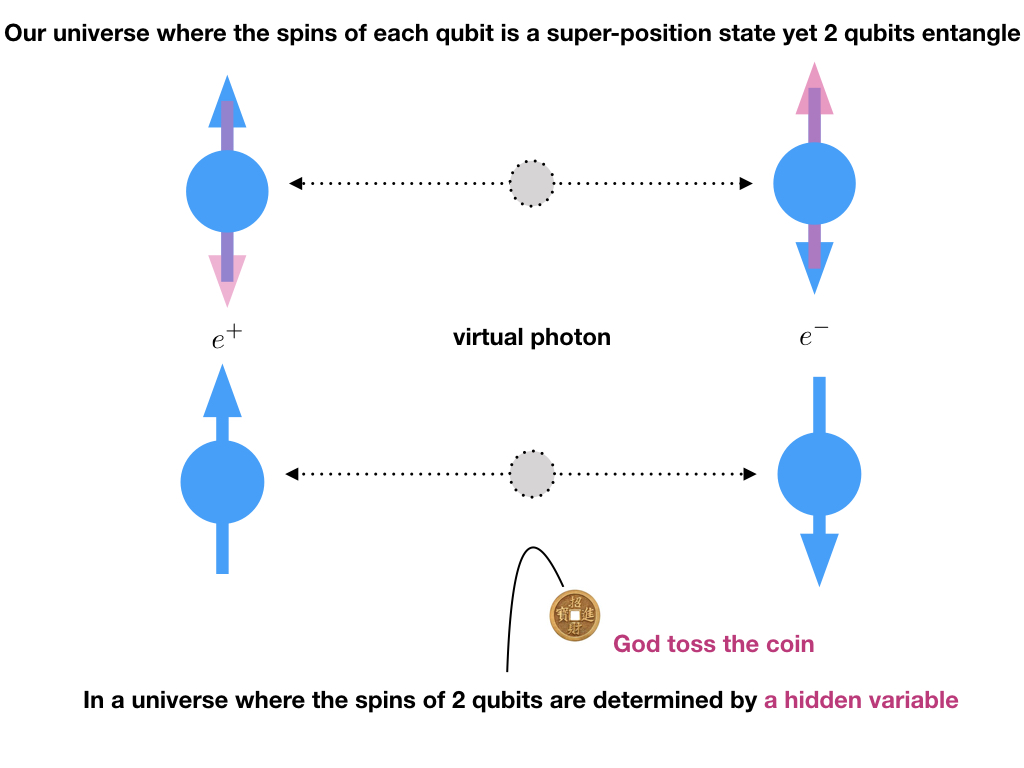

In [2]:
Image("images/epr.jpeg", height=300)

## 多量子比特： Tensor product to form larger vector space

For a system of $n$ qubits, the basis state vector has the form

\begin{equation*}
|i_1 i_2 i_3 \cdots i_n \rangle = |i_1\rangle \bigotimes  |i_2\rangle \bigotimes  |i_3\rangle \bigotimes  \cdots |i_n\rangle 
\end{equation*}
  
- Example: $|000...0\rangle = \begin{bmatrix} 1\\ 0 \end{bmatrix} \bigotimes \begin{bmatrix} 1\\ 0 \end{bmatrix} \bigotimes \begin{bmatrix} 1\\ 0 \end{bmatrix} \cdots \bigotimes \begin{bmatrix} 1\\ 0 \end{bmatrix}$ 
- For n=500, $| \Psi \rangle$ has $2^{500}$ amplitudes, the number is larger than the estimated number of atoms in the whole universe.
- Classical computer does not have such a big memory/hard disk to store the intermediate results.
- Quantum parallelism: the system evolves with $2^{500}$ hidden complex numbers. 



## 纠缠 Entanglement
For a system of $n$ qubits, a general form of  the state vector is
\begin{equation*}
|\Psi \rangle = \sum_{i_k = 0, 1} \alpha_{i_1 i_2 ... i_n} |i_1 i_2 \cdots i_n \rangle 
\end{equation*}
   
Some states can be decomposed in the tensor product form,

\begin{equation*}
|\Psi \rangle = \frac{ |0 0 \rangle + |01 \rangle}{\sqrt{2}} =  |0 \rangle \bigotimes \frac{ |0 \rangle + |1 \rangle}{\sqrt{2}}
\end{equation*}    

Some superposition states can not be decomposed in the tensor product form, these states are called **entangled states**.
    
\begin{equation*}
|\Psi \rangle = \frac{ |0 1 \rangle -  |10 \rangle}{\sqrt{2}}
\end{equation*}    



## 量子门 Quantum Gates

Similar to logistic operations in classical computer, there are logistic operators for qubits, which are called quantum gates,
  

-  Identity gate: $\mathbf{I} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.  $\mathbf{I}  | 0 \rangle = | 0 \rangle$ and $\mathbf{I}  | 1 \rangle = | 1 \rangle$.
-  NOT gate: $\mathbf{X} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$.  
- $\mathbf{X}  | 0 \rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \begin{bmatrix}  1 \\  0 \end{bmatrix} = \begin{bmatrix}  0 \\  1 \end{bmatrix} = | 1 \rangle$
-  $\mathbf{X}  | 1 \rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \begin{bmatrix}  0 \\  1 \end{bmatrix} = \begin{bmatrix}  1\\  0 \end{bmatrix} = | 0 \rangle$


NOT gate is the Pauli x matrix. Similarly, there are Y and Z gates, 
 
- $\mathbf{Y}  | 0 \rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}  \begin{bmatrix}  1 \\  0 \end{bmatrix} = i \begin{bmatrix}  0\\  1 \end{bmatrix} = i | 1 \rangle$

- $\mathbf{Y}  | 1 \rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}  \begin{bmatrix}  0 \\  1 \end{bmatrix} = -i \begin{bmatrix}  1\\  0 \end{bmatrix} = -i | 0 \rangle$

- $\mathbf{Z}  | 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}  \begin{bmatrix}  1 \\  0 \end{bmatrix} =  \begin{bmatrix}  1\\  0 \end{bmatrix} =  | 0 \rangle$
- $\mathbf{Z}  | 1 \rangle = \begin{bmatrix} 1 & 0\\ 0 & -1 \end{bmatrix}  \begin{bmatrix}  0 \\  1 \end{bmatrix} = - \begin{bmatrix}  0\\  1 \end{bmatrix} = - | 1 \rangle$

   
- $\mathbf{Y}$  gate also flips a qubit, but along $Y$ axis.
- $\mathbf{Z}$  gate only provides one phase shift to $ | 1 \rangle $ but does not flip qubit.
- One can do multi-steps operation: $\mathbf{ZYX} |0 \rangle = - i | 0 \rangle$.



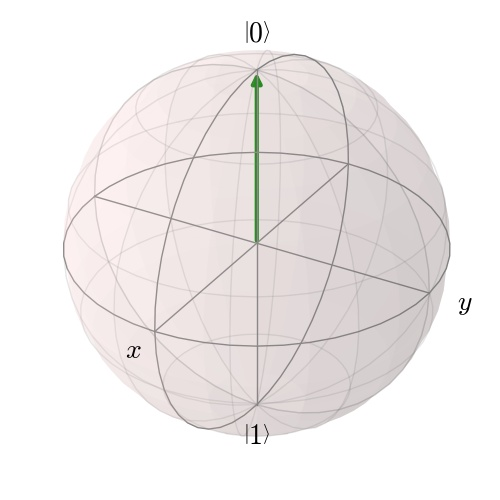

In [3]:
Image("images/bloch_sphere.jpg", height=500)

# 单个量子门 （2x2 幺正矩阵乘积）可以看作是对布洛赫球上矢量的旋转操作
# Single qubit gates (2x2 unitary matrix multiplications) can be considered
# as rotating operations on the Bloch sphere.

## Hadamard Gate

\begin{equation*}
    H \equiv \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}  = \frac{X + Z}{\sqrt{2}} 
   \end{equation*}

\begin{align}
H  | 0 \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)\\
H  | 1 \rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) 
\end{align}
   
   \begin{equation*}
    H (\alpha | 0 \rangle + \beta | 1 \rangle) =  \alpha \frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}} + \beta \frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}} 
   \end{equation*}
   
Hadamard gate 非常重要，它将 $| 0 \rangle$ or $| 1 \rangle$ 转化为叠加态（superposition state）.

## Controlled NOT gate for 2 qubits: CNOT
   

\begin{equation*}
{\rm CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
\end{equation*}

CNOT 作用在两个 Qubits 上，

\begin{align}
    {\rm CNOT}  | \color{red}{0 0} \rangle &=& | 0 \color{red}{0}\rangle \\
    {\rm CNOT}  | \color{red}{0 1} \rangle &=& | 0 \color{red}{1}\rangle \\
    {\rm CNOT}  | \color{red}{1 0} \rangle &=& | 1 \color{red}{1}\rangle \\
    {\rm CNOT}  | \color{red}{1 1} \rangle &=& | 1 \color{red}{0}\rangle
\end{align}

CNOT gate flip the 2nd qubit only when the first qubit is 1. 


### CNOT 与量子异或 XOR

The classical logical XOR gate is defined as (x + y 然后对 2 求 mod），

\begin{equation*}
       \mathrm{XOR}(x, y) \equiv x \bigoplus y \equiv   \left\{
                                \begin{array}{ll}
                                         1  \quad\;  x\neq y \\
                                         0  \quad\;  x=y \\
                                \end{array}
                                \right. \quad\;\;  x, y \in \{0, 1\}
\end{equation*}
      
Classical XOR: 
$0 \bigoplus 0 = 0$, $0 \bigoplus 1 = 1$, $1 \bigoplus 0 = 1$, $1 \bigoplus 1 = 0$



CNOT gate is a generalization of the classical XOR gate since $|A, B\rangle \rightarrow |A, A \bigoplus B\rangle$ where $\bigoplus$ denotes addition modulo 2.

 \begin{eqnarray*}
{\rm CNOT}  | \color{red}{0 0} \rangle &=& | 0 \color{red}{0}\rangle \\
{\rm CNOT}  | \color{red}{0 1} \rangle &=& | 0 \color{red}{1}\rangle \\
{\rm CNOT}  | \color{red}{1 0} \rangle &=& | 1 \color{red}{1}\rangle \\
{\rm CNOT}  | \color{red}{1 1} \rangle &=& | 1 \color{red}{0}\rangle
\end{eqnarray*}

量子门与经典逻辑操作的区别：

1. Classical AND, OR, XOR increases entropy.
2. Quantum gates conserve entropy (reversible) using one auxiliary qubit.

从 CNOT 门可以看出，量子异或输出了两个 Qubit，保证系统可逆。

### 与门 AND Gate

The classical logical AND gate is defined as,
      \begin{equation*}
       \mathrm{AND}(x, y) \equiv x \wedge y \equiv   \left\{
                                                                            \begin{array}{ll}
                                                                                     1  \quad\;  x=y=1 \\
                                                                                     0  \quad\;  \mathrm{otherwise} \\
                                                                            \end{array}
                                                                            \right. \quad\;\;  x, y \in \{0, 1\}
      \end{equation*}
         
The quantum AND gate is defined as,
      \begin{equation*}
       {\rm U}_{\mathrm{AND}} = ( |00 \rangle \langle 00| +   |01 \rangle \langle 01|   + |1 0 \rangle \langle 1 0| ) \bigotimes I + |1 1 \rangle \langle 1 1| \bigotimes X
       \end{equation*}  
       
One can verify that,      
      \begin{equation*}
       U_{\mathrm{AND}}|x, y, 0\rangle \equiv |x, y, x\wedge y \rangle, \quad\; x, y \in \{0, 1\}.
       \end{equation*}  
       
The input to the 3rd qubit is 0, the output is $x\wedge y$.

### 或门 OR Gate
The classical logical OR gate is defined as,
      \begin{equation*}
       \mathrm{OR}(x, y) \equiv x \vee y \equiv   \left\{
                                                                            \begin{array}{ll}
                                                                                     0  \quad\;  x=y=0 \\
                                                                                     1  \quad\;  \mathrm{otherwise} \\
                                                                            \end{array}
                                                                            \right. \quad\;\;  x, y \in \{0, 1\}
      \end{equation*}

In quantum case, let $|x, y, 0\rangle$  be the input state, the unitary matrix for OR gate is defined as,

\begin{equation*}
       U_{\mathrm{OR}} = |00 \rangle \langle 11| \otimes X+   |01 \rangle \langle 10| \otimes X  + |1 0 \rangle \langle 01 | \otimes X + |1 1 \rangle \langle 0 0| \otimes I
\end{equation*}

The output state would be $|\neg x, \neg y, x \vee y \rangle$ where $|\neg 0\rangle = |1\rangle $ and $|\neg 1\rangle = |0\rangle$. 


### 用 Hadamard Gate 和 CNOT Gate 制备著名的态
   
 
- Apply Hadamard gate to the first qubit of  $| 0 0\rangle $ state to get $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle $.
- Apply CNOT gate to the previously produced states to get entangled state $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.
- Start from different states, the Hadamard + CNOT gates can produce 4 different entangled states (Bell states)

\begin{align}
{\rm CNOT\ H} &| 0 0\rangle \rightarrow \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
{\rm CNOT\ H} &| 0 1\rangle \rightarrow \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \\
{\rm CNOT\ H} &| 1 0\rangle \rightarrow \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\ 
{\rm CNOT\ H} &| 1 1\rangle \rightarrow \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle) 
\end{align}


### 量子门荟萃


- Pauli gates: $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\; X=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \; Y=\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \; Z=\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $.
- Hadamard gates: $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$.
- Phase gates: $\mathrm{PHASE}(\theta)= \begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}$， $S=\mathrm{PHASE}(\pi/2), T = \mathrm{PHASE}(\pi/4)$

- Controlled phase gates, 
    - $\mathrm{CPHASE00}(\theta) = \mathrm{diag}(e^{i\theta}, 1, 1, 1) $
    - $\mathrm{CPHASE01}(\theta) = \mathrm{diag}(1, e^{i\theta}, 1, 1) $
    - $\mathrm{CPHASE10}(\theta) = \mathrm{diag}(1, 1, e^{i\theta}, 1) $
    - $\mathrm{CPHASE}(\theta) = \mathrm{diag}(1, 1, 1, e^{i\theta}) $

笛卡尔旋转门 Cartesian rotation gates:
 
\begin{eqnarray*} 
\mathrm{RX}(\theta) &=& \begin{bmatrix} \cos\frac{\theta}{2} & -i \sin \frac{\theta}{2} \\ -i \sin \frac{\theta}{2} & \cos\frac{\theta}{2} \\ \end{bmatrix} \\ 
\mathrm{RY}(\theta) &=& \begin{bmatrix} \cos\frac{\theta}{2} & -\sin \frac{\theta}{2} \\ \sin \frac{\theta}{2} & \cos\frac{\theta}{2} \\ \end{bmatrix} \\
 \mathrm{RZ}(\theta) &=& \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0\\ 0 & e^{i\frac{\theta}{2}} \\ \end{bmatrix} 
\end{eqnarray*}


Controlled NOT/CCNOT gates, CCNOT 又称 Toffoli gate,
 
\begin{eqnarray*} 
\mathrm{CNOT} & = & \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \\
\mathrm{CCNOT} & = & \begin{bmatrix} 1 & 0 & 0 & 0 &0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 &0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 &0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 &0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 &0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 &1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 &0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 &0 & 1 & 0 \end{bmatrix}
\end{eqnarray*}


Swap gates:
\begin{eqnarray} \mathrm{PSWAP}(\theta) &=& \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & e^{i\theta} & 0 \\ 0 & e^{i\theta} & 0 & 0\\ 0 & 0 & 0 & 1 \end{bmatrix} \\ \mathrm{SWAP} &=& \mathrm{PSWAP}(0) \\ \mathrm{ISWAP} &=& \mathrm{PSWAP}(\pi/2) \\ \mathrm{CSWAP} &=& \begin{bmatrix} 1 & 0 & 0 & 0 &0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 &0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 &0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 &0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 &0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 &0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 &1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 &0 & 0 & 1 \end{bmatrix} \end{eqnarray}

## 量子不可克隆定理 No-Cloning theorem


**An unknown quantum system can not be cloned by unitary transformation.**

**Proof:**  suppose there would exist $U$ that makes a clone of a quantum system, namely

   \begin{eqnarray*}
       U |\phi 0\rangle &\rightarrow&  |\phi \phi \rangle  \\
       U |\varphi 0 \rangle &\rightarrow&  |\varphi \varphi \rangle 
\end{eqnarray*}  

for any state $\phi$ and $\varphi$. Let $\phi$ and $\varphi$ are linearly independent, and $| \Psi \rangle = \frac{1}{\sqrt{2}}(|\phi\rangle + |\varphi \rangle)$. 

The following conclusions can not co-exist, 

\begin{eqnarray*}
           U|\Psi 0\rangle & = & \frac{1}{\sqrt{2}}(U|\phi 0\rangle + U|\varphi 0\rangle) =  \frac{1}{\sqrt{2}}(|\phi\phi\rangle + |\varphi \varphi\rangle)   \\
           U|\Psi 0\rangle & = &  |\Psi \Psi \rangle =  \frac{1}{2}(|\phi\phi\rangle + |\varphi \varphi\rangle + |\phi\varphi\rangle + |\varphi\phi\rangle)  
\end{eqnarray*}  


### 量子门的完备性

**Any unitary operation  can be approximated to arbitrary accuracy using Hadamard, phase, CNOT and $\pi/8$ gates**

- An arbitrary unitary operator can be expressed exactly as a tensor product of unitary operators that each acts non-trivially only on a subspace spanned by 2 computational basis states.
- An arbitrary unitary operator may be expressed exactly using single qubit and CNOT gates (universal).
- Single qubit operation may be approximated to arbitrary accuracy using the Hadamard, phase and $\pi/8$ gates.

### 测量算符

A measurement operator $M_m$ is constructed such that the probability of obtaining the outcome $m$ in the state $|\Psi\rangle$ is $p(m)$, 
and the state after the measurement becomes $|m\rangle$,
\begin{eqnarray*}
      p(m) & = & \langle \Psi | M_m^+ M_m | \Psi \rangle \\
      |m \rangle & = & \frac{M_m | \Psi \rangle }{\sqrt{p(m)}}
    \end{eqnarray*}    


**Example:** for state vector $|\Psi \rangle = a |0 \rangle + b |1 \rangle $, the measuring along $|0\rangle$ has the measurement operator $M_0 = |0 \rangle \langle 0 |  =  \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}$ such that, 
\begin{eqnarray*}
  p(0) & = & \langle \Psi | M^+_0 M_0 |\Psi \rangle = \langle 0 | a^* a |0 \rangle = |a|^2 \\
  \frac{M_0 | \Psi \rangle }{\sqrt{p(0)}} & = & \frac{a}{|a|} |0 \rangle 
\end{eqnarray*}  


**Example**: for state vector $|\Psi \rangle = a |0 0 \rangle + b |0 1 \rangle + c |1 0 \rangle  + d |1 1 \rangle $, the measuring for the first qubit along $|0\rangle$ and $|1\rangle$ have, 

\begin{eqnarray*}
      M_0 & = & |0 \rangle \langle 0 | \otimes I  =   \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{bmatrix}\;\;, |0 0 \rangle =  \begin{bmatrix} 1 \\ 0 \\ 0  \\ 0 \end{bmatrix} \; \;, |0 1 \rangle =  \begin{bmatrix} 0 \\ 1\\ 0  \\ 0 \end{bmatrix} \\
      M_1 & = & |1 \rangle \langle 1 | \otimes I  \\
      p(0) & = & \langle \Psi | M^+_0 M_0 |\Psi \rangle =|a|^2 + |b|^2 \\
      \frac{M_0 | \Psi \rangle }{\sqrt{p(0)}} & = &  |0 \rangle \otimes (\frac{a}{\sqrt{|a|^2 + |b|^2}} |0\rangle + \frac{b}{\sqrt{|a|^2 + |b|^2}} |1\rangle )
    \end{eqnarray*}  

### 投影测量

A projective measurement is described by an observable, **$M$, a Hermitian operator** on the state space of the system being observed. The observable has a special decomposition,

\begin{equation*}
 M = \sum_m m P_m 
\end{equation*}
where $P_m$ is the projector onto the eigenspace of M with eigenvalue m. Upon measuring $|\Psi \rangle$, the probability of getting $|m\rangle$ is given by 
\begin{equation*}
 p(m) = \langle \Psi | P_m | \Psi \rangle 
\end{equation*}
the state after the measurement is,
\begin{equation*}
 \frac{P_m | \Psi \rangle }{\sqrt{p(m)}}
\end{equation*}


The expectation of one observable M is easy to compute since

\begin{equation*}
      \langle M \rangle  =  \sum_m p(m) 
       =  \sum_m \langle \Psi | P_m |\Psi \rangle 
       =  \langle \Psi | M |\Psi \rangle
\end{equation*}  

Standard deviation is $\langle M^2 \rangle - \langle M \rangle^2$.

Suppose we have state $|0\rangle$ and we measure observable X, what is the expectation value of X? ( Exercise 2.59 from M.A. Nielsen and I.L. Chuang's book)

**Solution:**
\begin{equation*}
 \langle 0 | X | 0\rangle = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 0
\end{equation*}

## 另一种测量 POVM: Positive Operator-Valued Measure

General quantum measurements compute 

1. the probability of some measurement outcomes}, 
2. the post-measurement state.

In an experiment where the system is measured once to get the final conclusion, only the probability is  required,

\begin{equation*}
 p(m) = \langle \Psi | M_m^+ M_m | \Psi \rangle 
\end{equation*}

- One can define $E_m \equiv  M_m^+ M_m$ where $E_m$ is a positive operator such that $\sum_m E_m = I$. 
- The complete set of $\{E_m\}$ is called one POVM.

### Pauli Measurements (from Microsoft Quantum Computing Doc)

It is common to see "measuring Pauli operators" such as X, Y, Z or $X \otimes X$, $X \otimes Y$, $Z \otimes Z$ in quantum simulations since the Hamiltonian can be 
decomposed into Pauli matrices.

- Suppose we have n qubit quantum system, measuring one qubit immediately collapse $2^n$ dimensional Hilbert space to one of its two half-spaces. 
- "Measuring Z" is entirely equivalent to performing a computational basis measurement.
- Then any 2x2 matrix that is a unitary transformation of Z is also a valid measurement, e.g. $A = U^{\dagger} Z U$.



**Pauli Measurements**


- "Measuring Z" is entirely equivalent to performing a computational basis measurement.
- "Measuring X" is equivalent to applying H to state vector and then measuring in the computational basis.
- "Measuring Y" is equivalent to applying $H S^{\dagger}$ to state vector and then measuring in the computational basis.

where $S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$ is the phase gate and one can verify that,
\begin{eqnarray*}
 X & = & H^{\dagger} Z H \\
 Y & = & SH^{\dagger} Z H S^{\dagger} 
\end{eqnarray*}


\begin{equation*}
Z \otimes Z = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
\end{equation*}


- Notice that $Z\otimes Z$ forms a matrix composed of two spaces consisting of +1 and -1 eigenvalues.
- While $Z \otimes I$ also divide the space into +1 half eigenspace and -1 half eigenspace.


\begin{equation*}
Z \otimes Z  \neq Z \otimes I \; then \; I \otimes Z
\end{equation*}


- $Z\otimes Z$ or $X \otimes X$ measures correlations between two qubits
- $Z \otimes I$ measures information locally stored in one single qubit.
- Even $X \otimes Y \otimes Z \otimes I$ has only 2 eigenvalues +1 and -1, and both eigenspace consist half space of the entire vector space. 
- Such multiple qubits measurement is useful to extract information stored non-locally in all qubits.


## CHSH/Bell 不等式 （inequality）


 In 1969 John Clauser, Michael Horne, Abner Shimony, and Richard Holt derived the following CHSH inequality $|C|\le2$. Suppose Charlie prepares 2 particles and send one to Alice, one to Bob. Alice perform 2 different measurements Q, R, Bod perfom S, T at the same time with Alice (causally disconnected), after many measurements, Alice and Bob come together to check expectations of the following observables, classically

<img src="images/bell_classical.jpeg"></img>


经典情况，检验隐变量假设：

\begin{eqnarray*}
      C &=& \langle Q S \rangle  - \langle Q T \rangle + \langle R S \rangle + \langle R T \rangle\\
          &=& \sum_{\lambda} P(\lambda) \left[ Q(\lambda) (\color{blue}{S(\lambda) - T(\lambda)}) + R(\lambda) (\color{blue}{S(\lambda) + T(\lambda)}) \right] \le 2
\end{eqnarray*}    


**Quantum mechanics break CHSH/Bell inequality**
 
<img src="images/bell_quantum.jpeg"></img>


where $W = \frac{-1}{\sqrt{2}}(Z + X)$ and $V = \frac{1}{\sqrt{2}}(Z - X)$. The $Z, X, W, V$ are 4 observables used in projective measurement method,
    \begin{eqnarray*}
      C &=& \langle Q S \rangle - \langle Q T \rangle  + \langle R S \rangle + \langle R T \rangle \\
         &=&  \langle Z W \rangle - \color{red}{\langle Z V\rangle}  + \langle X W \rangle + \langle X V \rangle \\
         &=& \frac{1}{\sqrt{2}} -  \color{red}{(-\frac{1}{\sqrt{2}})} + \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}}  \\
         &=& 2\sqrt{2} > 2
    \end{eqnarray*}    


Let's verify $\langle Z V\rangle = -\frac{1}{\sqrt{2}}$

Using projective measurement method,
    \begin{eqnarray*}
    \langle \Psi | &=& \frac{  \langle 01 | -  \langle 10 |}{\sqrt{2}} =  \frac{1}{\sqrt{2}} \begin{bmatrix} 0 & 1 & -1 & 0 \end{bmatrix} \\
    ZV & \equiv & Z\otimes V = Z \otimes \frac{ Z - X}{\sqrt{2}} \\
          & =  & \begin{bmatrix} 1 & 0 \\0 & -1 \end{bmatrix} \otimes  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & -1 \\-1 & -1 \end{bmatrix} \\
    \color{red}{\langle Z V\rangle} & = &  \langle \Psi | Z V | \Psi \rangle \\
    & = & \frac{1}{2\sqrt{2}} \begin{bmatrix} 0 & 1 & -1 & 0 \end{bmatrix} \begin{bmatrix} 1 & -1 & 0 & 0 \\-1 & -1 & 0 &  0 \\ 0 & 0 & -1 & -1 \\ 0 & 0 & 1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ -1 \\ 0 \end{bmatrix} \\
    & = & -\frac{1}{\sqrt{2}}
    \end{eqnarray*}    

### 量子计算机 Quantum Computer


- A set of registers (the Hilbert space)
- Unitary matrices that operates on the registers
- Measurements to extract the information


### DiVincenzo Criteria: 

DiVincenzo proposed **five criteria** that any physical system must satisfy to be a viable quantum computer.

- A scalable physical system with well-characterized qubits.
- The ability to initialize the state of the qubits to a simple fiducial state, such as $|00...0\rangle$
- Long decoherence times, much longer than the gate operation time.
- A universal set of quantum gates.
- A qubit-specific measurement capability.

Different realizations


- Optical cavity QED with atoms
- Ion traps
- Liquid-state/solid-state Nuclear Magnetic Resonance (NMR)/Electron Nuclear Double Resonance (ENDOR)
- Neutral atoms in optical lattice
- Linear optics
- Quantum dots (spin-based, charge-based)
- Josephson junctions (charge, flux and current-biased qubits)
- Electrons on liquid helium surface


## IBM quantum computer (IBM 云量子计算机）


- Josephson Junctions （硬件：超导约瑟夫结+微波控制、读出）
- 可视化网页接口： IBMQ-Experience: cloud quantum computer using composer
- Python编程接口：QISKit: Quantum Information Software Kit in python

可视化网页接口：https://quantum-computing.ibm.com/composer/files/new

<img src="images/IBM_Quantum.png"></img>

## 退激发 T1

Energy relaxation and T1: time constant that describes excited state $|1\rangle$ decays towards ground state $|0\rangle$.

<img src="images/relaxation.png"></img>

- quantum computer simulator: with probability 1 on $|00010\rangle$ state.
- real quantum computer (IBM 5 qubits): P( $|00010\rangle$) = 0.86, P( $|00000\rangle$) = 0.14

### 退相干 T2 （Decoherence）

Dephasing and T2: describe the phase decay in a super-position system.


<img src="images/dephasing.png"></img>


- HYH$|0\rangle = - i |1 \rangle $ 
- quantum computer simulator: with probability 1 on $|00000\rangle$ state
- IBM 5 qubits quantum computer: P( $|00010\rangle$) = 0.074, P( $|00000\rangle$) = 0.926


# 用 Python 写一个玩具量子计算机

## 量子位 Qubit 和 量子门 Gate

原则上可以直接安装 qiskit，尝试 IBM 的云量子计算机 Python 接口及模拟器，

```bash
pip install qiskit
```
或者
```python
from sympy.physics import quantum
```

这里我们按照前面讲过的内容自己实现一个玩具级别的量子计算机模拟器。实现目标：

- 单量子位 (Qubit)，多Qubit，叠加态 (superposition state), 纠缠态（entanglement) 实现
- 几个常见的量子门 (Gate) 及其作用
- 单Qubit操作，多Qubit操作，态的直积，矩阵的直积

In [4]:
## 需要使用功能1：调用 Markdown 直接输出数学公式

from IPython.display import Markdown as md
md(r'$|00100\rangle$')

$|00100\rangle$

In [5]:
## 需要使用功能2：调用 python 自带函数 bin，将整数转化为 2 进制表示

help(bin)

Help on built-in function bin in module builtins:

bin(number, /)
    Return the binary representation of an integer.
    
    >>> bin(2796202)
    '0b1010101010101010101010'



In [6]:
bin(7)

'0b111'

In [7]:
# python 中 char * n 或 list * n 操作

'0'*3

'000'

In [8]:
### 单个量子比特的实现

import numpy as np
from scipy.linalg import kron
from IPython.display import Markdown as md
# 实现单个 Qubit
spin_up = np.array([[1, 0]]).T
spin_down = np.array([[0, 1]]).T
# bit[0] = |0>, bit[1] = |1>
bit = [spin_up, spin_down]

In [9]:
# 给定 Qubits 序列，返回它的 one hot 表示，
def basis(string='00010'):
    '''string: the qubits sequence'''
    res = np.array([[1]])
    # 从最后一位开始往前数，做直积
    for idx in string[::-1]:
        res = kron(bit[int(idx)], res)    
    return np.matrix(res)

In [10]:
# 构造 |10> 的 one hot 表示，
# 可以尝试 |00>, |01>, |10>, |11>
basis('10')

matrix([[0],
        [0],
        [1],
        [0]])

In [11]:
# basis() 返回了 np.matrix 数据类型，它的 .A1 属性将矩阵转化为 1 维 numpy 数组。
basis('10').A1

array([0, 0, 1, 0])

回忆多个 Qubit 使用了 直积 $\otimes$ 操作，

- $|00 \rangle = \begin{bmatrix} \color{red}{1}\\ \color{red}{0} \end{bmatrix} \bigotimes \begin{bmatrix} \color{blue}{1}\\ \color{blue}{0} \end{bmatrix} = \begin{bmatrix} \color{red}{1}\times \color{blue}{1}\\ \color{red}{1}\times \color{blue}{0} \\ \color{red}{0}\times \color{blue}{1} \\  \color{red}{0}\times \color{blue}{0}\end{bmatrix} = \begin{bmatrix} 1\\ 0 \\ 0 \\ 0\end{bmatrix}$

直积通过 scipy.linalg 中的 kron() 函数实现。

两个Qubit，基向量是4维，3个Qubit是8维，10个Qubit基向量是1024维，在多体量子计算中，大家一般要计算超大矩阵的基态本征值，如果用 100 个 Qubit 进行 $2^{100}$ 个态的多体量子系统计算，可远超经典计算机能够存储和处理的数据极限。自从费曼提出这个想法，大家就一直为量子计算机而疯魔。

这里我们随便试一下 20 个量子比特的基向量的维数，

In [12]:
len(basis('00100000001000011100'))

1048576

即原则上 20 个 Qubit 可以解 1048576 x 1048576 维哈密顿矩阵的本征值问题。

如果是50 个 Qubit，那么单方向维数就是 1125899906842624 。

我们可以看一看 n 个 Qubit 支撑起来的希尔伯特空间，

In [13]:
def hilbert_space(nbit=5):
    #  n 个 qubit 张开空间为 2**n 维
    nspace = 2**nbit
    for i in range(nspace):
        '''bin(7) = 0b100'''
        binary = bin(i)[2:]
        nzeros = nbit - len(binary)
        yield '0'*nzeros + binary 

这个函数使用了 python 内置 bin() 函数，将数字转化为二进制序列。希尔伯特空间维数 $2^n$ 随 Qubit 个数 n 呈指数增长，所以我们使用 yield 返回一个 generator，不保存数组，但可循环取值。举例，对于 3 个Qubit，希尔伯特空间基向量有8个，

In [14]:
for mi in hilbert_space(nbit=3):
    print(mi, end=',')

000,001,010,011,100,101,110,111,

### 构造叠加态波函数

波函数是各个基向量的线性叠加，系数为复数，称为振幅。
\begin{align}
|\Psi \rangle = \sum_i c_i |\phi_i\rangle
\end{align}

如果给定系数和基向量，可以定义如下函数计算波函数，

In [15]:
def wave_func(coef=[], seqs=[]):
    '''返回由振幅和几个Qubit序列表示的叠加态波函数，
       sum_i coef_i |psi_i> '''
    res = 0
    for i, a in enumerate(coef):
        res += a * basis(seqs[i])
    return np.matrix(res)

比如，对于 3个 Qubit 的叠加态波函数

\begin{align}
|\Psi\rangle = {i \over \sqrt{3} } |000\rangle + \sqrt{2 \over 3} |100\rangle
\end{align}

In [16]:
coef = [1j/np.sqrt(3), np.sqrt(2/3)]
seqs = ['000', '100']
s = wave_func(coef, seqs)
s

matrix([[0.        +0.57735027j],
        [0.        +0.j        ],
        [0.        +0.j        ],
        [0.        +0.j        ],
        [0.81649658+0.j        ],
        [0.        +0.j        ],
        [0.        +0.j        ],
        [0.        +0.j        ]])

输出 $s=|\Psi \rangle$ 是波函数在计算机内部的存储格式，其中 1j 是复数中虚数的基本单位 i.

可以简单的验证， $ \langle s| s\rangle = 1 $

In [17]:
s.H * s

matrix([[1.+0.j]])

其中 s.H 计算了 $|s \rangle$ 的转置共轭 $\langle s |$ ，也称$|s \rangle$的厄密特。
s 为 numpy.matrix 数据类型, 内置了 H 属性。

### 波函数的展开形式

对于一个经过多次操作，已经看不出原形的波函数，可以将其朝各个基向量上投影，找出振幅，并分解。如果某个基为 $|\phi_i \rangle$ , 则 $|\Psi \rangle$ 朝这个方向投影得到的振幅系数为 $c_i = \langle \Psi  | \phi_i \rangle$ 。我们来定义一个投影函数，

In [18]:
def project(wave_func, direction):
    '''<Psi | phi_i> to get the amplitude '''
    return wave_func.H * direction

通过将波函数 $|\Psi \rangle$ 朝各个基向量投影，可以写出人类好识别的形式，

下面定义一个函数，
decompose(wave_func) 将波函数分解，输出振幅序列和以Qubits序列表示的基向量列表。

In [19]:
def decompose(wave_func):
    '''将叠加态波函数分解'''
    nbit = int(np.log2(len(wave_func)))
    amplitudes = []
    direct_str = []
    for seq in hilbert_space(nbit):
        direct = basis(seq)
        amp = project(wave_func, direct).A1[0]
        if np.linalg.norm(amp) != 0:
            amplitudes.append(amp)
            direct_str.append(seq)
    return amplitudes, direct_str

使用 jupyter notebook 的 Markdown 函数，可以输出漂亮的数学符号格式，

In [20]:
def print_wf(wf):
    # 先将波函数分解成振幅序列与 Qubit序列，再用 latex 公式表示
    coef, seqs = decompose(wf)
    latex = ""
    for i, seq in enumerate(seqs):
        latex += r"%s$|%s\rangle$"%(coef[i], seq)
        if i != len(seqs) - 1:
            latex += "+"
    return md(latex)

In [21]:
print_wf(s)

-0.5773502691896258j$|000\rangle$+(0.816496580927726+0j)$|100\rangle$

上面例子中的 ${i \over \sqrt{3} } |000\rangle + \sqrt{2 \over 3} |100\rangle = ({i \over \sqrt{3} } |0\rangle + \sqrt{2 \over 3} |1\rangle)\otimes |00\rangle$ 是叠加态但不是纠缠态。所有纠缠态都不能写成直积形式。再举个非纠缠态的例子，

$|\psi\rangle = {1 \over 2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle)= {1 \over 2} (|0\rangle + |1\rangle)\otimes(|0\rangle + |1\rangle) $

而下面这个态不能展开为直积形式，为纠缠态，

$|\psi\rangle = {1 \over \sqrt{2}} (|01\rangle - |10\rangle ) $

这是两个费米子的纠缠态，一个自旋向上spin up，一个自旋向下spin down，总自旋为0。但是，没有人知道哪个 spin up，哪个 spin down，系统是两种可能的叠加态。同时，只要测量知道了一个费米子 spin up, 那另一个费米子一定是 spin down。无论对一方测量的时候，另一方离得有多远。它们是纠缠在一起的，总自旋为0。这就是爱因斯坦说的鬼魅般的超距相互作用。

### 量子门 Gate

作用在单 Qubit 或两 Qubit 上的量子门很好构造，

In [22]:
# Define the one-qubit and 2-qubit operation gates 
I = np.matrix("1 0; 0 1")
X = np.matrix("0 1; 1 0")
Y = np.matrix("0 -1j; 1j 0")
Z = np.matrix("1 0; 0 -1")
H = np.matrix("1 1; 1 -1") / np.sqrt(2)

CNOT = np.matrix("1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0")

SWAP = np.matrix("1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1")

gates = {'I':I,  'X':X, 'Y':Y, 'Z':Z, 'H':H, 'CNOT':CNOT, 'SWAP':SWAP}

***X 门翻转 Qubit***

举例：计算 $X |0\rangle$

In [23]:
print_wf(X * spin_up)

1$|1\rangle$

In [24]:
print_wf(X * spin_down)

1$|0\rangle$

In [25]:
print_wf(X * (0.6 * spin_up + 0.8 * spin_down))

0.8$|0\rangle$+0.6$|1\rangle$

***Y 门带相位翻转***

计算  $Y|0\rangle $

In [26]:
print_wf(Y*spin_up)

-1j$|1\rangle$

In [27]:
print_wf(Y * spin_down)

1j$|0\rangle$

***Z 门只引起 |1> 的相位改变***

In [28]:
print_wf(Z*spin_up)

1$|0\rangle$

In [29]:
print_wf(Z*spin_down)

-1$|1\rangle$

***Hadamard 门生成叠加态***

In [30]:
print_wf(H * bit[0])

0.7071067811865475$|0\rangle$+0.7071067811865475$|1\rangle$

In [31]:
print_wf(H * bit[1])

0.7071067811865475$|0\rangle$+-0.7071067811865475$|1\rangle$

注意这里 bit[0] 跟 spin_up 等价，bit[1] 跟 spin_down等价，H 是 Hadamard 门, 那一长串数字为：

${1 \over \sqrt{2}} = 0.7071067811865475 $

### 对多个 Qubit 中的一位操作

如果想将 $|001\rangle$ 中的 1 翻转为 0，量子门该如何构造？此时虽然看上去是单量子比特操作，而实际上它是多量子比特操作，只不过前两个 0 上的操作为 不变操作 I 。

$|001\rangle$ 是一个 8 维列向量。所以门电路现在是 8 × 8 的矩阵，由 $I \otimes I \otimes X$ 构造，

注意，多个 Qubit 序列中 $|001\rangle$ 右边的表示低位，左边的表示高位。

In [32]:
## 给定 Gates，返回张量积矩阵
def krons(gates=[I, I, X]):
    res = np.matrix([[1]])
    for g in gates[::-1]:
        res = kron(g, res)
    return res

In [33]:
IIX = kron(I, kron(I, X))
IIX 

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

我们将此矩阵作用在 $|001\rangle$ 上检查一下，

In [34]:
s001 = basis('001')
IIX = kron(I, kron(I, X))
print_wf(IIX * s001)

1$|000\rangle$

### 验证两 Qubit 操作的 CNOT 门

\begin{align}
{\rm CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
\end{align}

In [35]:
s00 = basis('00')
print_wf(CNOT * s00)

1$|00\rangle$

In [36]:
s01 = basis('01')
print_wf(CNOT * s01)

1$|01\rangle$

In [37]:
s10 = basis('10')
print_wf(CNOT * s10)

1$|11\rangle$

In [38]:
s11 = basis('11')
print_wf(CNOT * s11)

1$|10\rangle$

此处验证了 CNOT 只有作用在 $|0 1\rangle$ 和 $|1 0 \rangle$ 上时，第二位才为 1 。

这等价于经典逻辑里的 XOR 操作，也就是单层人工神经网络搞不定，至少需要一个隐藏层才能描述的那个操作。

### 验证 SWAP Gate

另一个对两量子比特做操作的门是 SWAP gate，它的作用是将 |01> 翻转为 |10>, 或者将 |10> 翻转成 |01>。其矩阵形式为，
\begin{align}
{\rm SWAP} = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \end{bmatrix} 
\end{align}

In [39]:
print_wf(SWAP * basis('10'))

1$|01\rangle$

### 纠缠态的制备

对 $|00\rangle$ 的左边那位做 Hadamard 门操作变成 

$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle $ 

然后再接一个 CNOT 门操作，就会制备出纠缠态： 

$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $

In [40]:
# HI 等于 H 与 I 的直积
HI = kron(H, I)
print_wf(CNOT * HI * basis('00'))

0.7071067811865475$|00\rangle$+0.7071067811865475$|11\rangle$

同样的 Hadamard+CNOT 门操作，选择不同的输入，$|00>, |01>, |10> 以及 |11>$, 将会产生如下4个纠缠态(同时也是贝尔不等式的四个贝尔态），
\begin{align}
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle), \quad\; \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle), \quad\; \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle), \quad\; \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle) 
\end{align}

第四个纠缠态 
$\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$
也称 EPR 态，来自于爱因斯坦和另外两个科学家一起提出的用来推翻量子力学的著名假想实验，EPR佯谬。

有了叠加态和纠缠态，就可以试着在量子计算机上做一些有意思的实验，比如 Bell 不等式实验。

## 作业

将上述代码中会复用的部分搜集在一个文件中，命名为 qubit.py, 然后尝试在 jupyter notebook 中以库的形式调用,
1. 实现四个 Bell 态
2. 使用 EPR 态验证量子力学破坏了贝尔不等式, 即 $C = \langle Q S \rangle - \langle Q T \rangle  + \langle R S \rangle + \langle R T \rangle  = 2\sqrt{2} \gt 2$.

比如：

```python
from qubit import H, I, CNOT, kron

HI = kron(H, I)
epr = CNOT * HI * basis('11')

def avg(O1, O2):
    return *** （此处自己实现）

c = avg(Q, S) - avg(Q, T) + avg(R, S) + avg(R, T)
c
```
c 的预期输出为：matrix([[2.82842712]])